#### 뉴스 카테고리 분류 모델


[1] 데이터 불러오기 + 합치기<hr>

In [1]:
import pandas as pd
import re
import numpy as np

In [2]:
# 불필요한 컬럼 제외하고 가져오기
eduDF=pd.DataFrame()
envDF=pd.DataFrame()
foodDF=pd.DataFrame()
df_list=[eduDF, envDF, foodDF]
FILE_LIST=['./data/all_0.csv', './data/all_1.csv', './data/all_2.csv']


def make_kor(file, count):
    filterDF=pd.DataFrame()
    dataDF=pd.read_csv(file)         # 파일 읽기
    all=[]
    for text in dataDF['text']:
        a= re.sub('[^ㄱ-ㅎ가-힣]+',' ',text)         #한글만 남겨놓기
        all.append(a)
    filterDF['text']=all
    filterDF['label']=count
    return filterDF

In [3]:
edu=make_kor(r'C:\Users\KDP-25\Desktop\test\NLP\project\data\all_0.csv',0)
env=make_kor(r'C:\Users\KDP-25\Desktop\test\NLP\project\data\all_1.csv',1)
food=make_kor(r'C:\Users\KDP-25\Desktop\test\NLP\project\data\all_2.csv',2)

edu.info(), env.info(), food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4997 entries, 0 to 4996
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    4997 non-null   object
 1   label   4997 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 78.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4933 entries, 0 to 4932
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    4933 non-null   object
 1   label   4933 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 77.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4940 entries, 0 to 4939
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    4940 non-null   object
 1   label   4940 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 77.3+ KB


(None, None, None)

In [4]:
newsDF=pd.concat([edu, env, food])
newsDF['label'].value_counts()

label
0    4997
2    4940
1    4933
Name: count, dtype: int64

[2] 데이터 토큰화 및 불용어 제거 후 단어사전 생성<hr>

In [5]:
from konlpy.tag import Okt
from collections import Counter
from NLPfunc import *

In [6]:
len(newsDF)

14870

In [7]:
# 학습, 테스트 분리 후 DS
newsDF=newsDF.reset_index(drop=True)
trainDF=newsDF.sample(frac=0.9, random_state=100)
testDF=newsDF.drop(trainDF.index)
print(trainDF.index)


# 토큰화 인스턴스
okt=Okt()

Index([  353, 14120,  3734,  7128, 10242, 11632, 11503,  2896,  2551,  9986,
       ...
       10706,  4631,  4532,  7950, 12245,  5963, 12878,  4923,   714,  4469],
      dtype='int64', length=13383)


In [8]:
testDF['label'].value_counts(), trainDF['label'].value_counts()

(label
 0    507
 2    495
 1    485
 Name: count, dtype: int64,
 label
 0    4490
 1    4448
 2    4445
 Name: count, dtype: int64)

In [9]:
## 불용어 리스트 불러오는 함수
STOP_PATH = 'kor_stopwords.txt'


stopwords = make_stopwords(STOP_PATH)

In [10]:
# 토큰화 및 단어사전 생성
train_vocab= make_vocab(data=trainDF['text'], tag=okt, stopwords=stopwords, vocab_num=10000)
# test_vocab= make_vocab(data=testDF['text'], tag=okt, stopwords=stopwords, vocab_num=10000)

print(len(train_vocab))

9741


In [11]:
# 불용어 제거
t_vocab=train_vocab.copy()
for key, v in t_vocab.items():
    if key in stopwords:
        a= train_vocab.pop(key)

In [12]:
train_vocab.items()

dict_items([('<PAD>', 0), ('<UNK>', 1), ('할', 2), ('서울', 3), ('명', 4), ('기자', 5), ('교사', 6), ('한다', 7), ('학생', 8), ('연합뉴스', 9), ('교육', 10), ('제공', 11), ('의료', 12), ('학교', 13), ('지역', 14), ('시', 15), ('전', 16), ('위', 17), ('사진', 18), ('병원', 19), ('지난', 20), ('며', 21), ('정부', 22), ('원', 23), ('됐다', 24), ('밝혔다', 25), ('지원', 26), ('오후', 27), ('환자', 28), ('사업', 29), ('대한', 30), ('비', 31), ('장', 32), ('대학', 33), ('날', 34), ('뉴스', 35), ('서', 36), ('성', 37), ('관련', 38), ('교육부', 39), ('환경', 40), ('한국', 41), ('통해', 42), ('뉴시스', 43), ('발생', 44), ('교육청', 45), ('운영', 46), ('회', 47), ('문제', 48), ('전국', 49), ('관리', 50), ('계획', 51), ('금지', 52), ('되는', 53), ('해야', 54), ('경우', 55), ('결과', 56), ('진행', 57), ('일본', 58), ('사회', 59), ('연', 60), ('교수', 61), ('따르면', 62), ('하기', 63), ('평가', 64), ('치료', 65), ('센터', 66), ('기관', 67), ('지', 68), ('씨', 69), ('열린', 70), ('오염수', 71), ('올해', 72), ('위원회', 73), ('기준', 74), ('부산', 75), ('재판매', 76), ('현장', 77), ('보다', 78), ('에서는', 79), ('더', 80), ('정책', 81), ('피해', 82), ('

In [13]:
# 문장 벡터화
trainVec=vectorize(vocab=train_vocab, DF=trainDF, tokenizer=okt)
testVec=vectorize(vocab=train_vocab, DF=testDF, tokenizer=okt)

In [162]:
# 행당 길이 시각화
len_list=[]
for t in trainVec['text']:
    len_list.append(len(t))
    print(len(t))

0
256
1389
66
187
1079
72
1330
76
198
419
1092
252
308
57
466
41
319
34
128
483
283
265
447
529
74
35
187
577
838
1102
486
512
90
353
704
285
355
407
796
359
656
628
523
493
116
651
335
0
246
397
299
336
355
222
196
645
252
474
619
353
0
466
670
421
170
940
648
674
76
496
652
40
678
93
425
113
42
218
219
337
275
346
462
359
272
364
105
129
741
525
290
335
395
564
390
337
212
595
22
306
317
219
751
64
572
1666
257
344
890
0
554
116
476
846
253
436
304
382
394
288
420
138
128
202
52
438
509
105
97
437
707
295
411
619
384
45
327
234
373
656
829
377
315
155
46
536
981
544
448
19
40
1271
71
288
50
120
32
680
76
354
377
514
116
2071
539
597
786
301
802
336
604
216
218
223
215
0
357
430
345
76
65
502
665
38
27
271
492
633
46
65
480
783
223
283
395
230
199
340
281
163
328
154
344
182
493
358
322
202
672
224
334
595
330
235
399
1162
363
24
1456
466
215
369
203
76
71
287
111
313
257
202
58
347
1091
615
408
87
241
336
399
437
107
0
318
375
417
66
577
31
265
41
133
554
265
488
171
121
308
498
970


((array([1.2631e+04, 6.9900e+02, 4.1000e+01, 9.0000e+00, 1.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00]),
  array([   0. ,  883.7, 1767.4, 2651.1, 3534.8, 4418.5, 5302.2, 6185.9,
         7069.6, 7953.3, 8837. ]),
  <BarContainer object of 10 artists>),
 367.85825300754686,
 [8837,
  7321,
  3946,
  3530,
  3414,
  3312,
  3237,
  2983,
  2974,
  2717,
  2704,
  2656,
  2573,
  2528,
  2523,
  2513,
  2511,
  2495,
  2409,
  2393,
  2358,
  2327,
  2242,
  2228,
  2221,
  2220,
  2200,
  2199,
  2141,
  2129,
  2102,
  2098,
  2097,
  2084,
  2071,
  2064,
  2028,
  2022,
  1987,
  1982,
  1973,
  1938,
  1914,
  1899,
  1893,
  1847,
  1832,
  1804,
  1800,
  1797,
  1782,
  1782,
  1774,
  1766,
  1764,
  1759,
  1755,
  1755,
  1745,
  1745,
  1737,
  1735,
  1733,
  1722,
  1718,
  1716,
  1712,
  1706,
  1698,
  1693,
  1687,
  1681,
  1678,
  1666,
  1664,
  1658,
  1657,
  1653,
  1653,
  1644,
  1642,
  1639,
  1638,
  1634,
  1631,
  1619,
  1

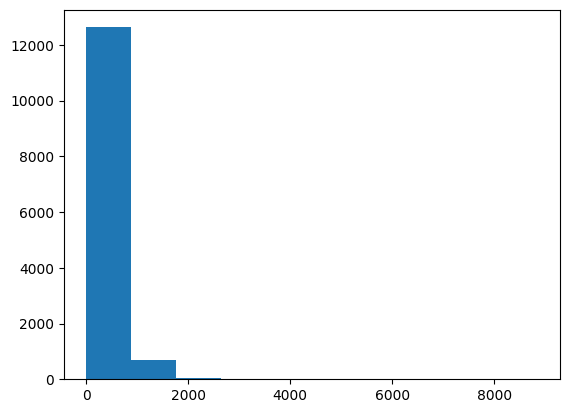

In [192]:
plt.hist(len_list), np.mean(len_list), np.median(len_list)

In [193]:
train_pad=padding(length=1000, textList=trainVec['text'])
trainPad=trainVec.copy()
trainPad['text']=train_pad
test_pad= padding(length=1000, textList=testVec['text'])
testPad=testVec.copy()
testPad['text']=test_pad

[3] 모델 설계 및 훈련 진행<hr>
- 라벨: 3개 (분류)
- 알고리즘: rnn/ lstm
- 0:교육, 1:환경, 2:의료/식품

In [194]:
# 데이터셋, 데이터로더 생성
import torch

train_tensor=torch.tensor(train_pad)
train_label= torch.FloatTensor(trainVec['label'].values).long()

test_tensor=torch.tensor(test_pad)
test_label= torch.FloatTensor(testVec['label'].values).long()

trainDS=TextDataset(train_tensor, train_label)
testDS= TextDataset(test_tensor, test_label)

trainDL=DataLoader(trainDS, batch_size=50)
testDL=DataLoader(testDS, batch_size=50)


In [195]:
# 데이터로더 확인
for f, t in trainDL:
    print(f.shape)
    break

torch.Size([50, 1000])


In [196]:
import torch.nn as nn
from typing import Literal
from torch import optim
import os


In [197]:
# 커스텀 모델 및 파라미터 설정

# 모델 파라미터
n_vocab= len(train_vocab)
hidden_dim= 64
embedding_dim= 128
n_layers= 2
device= 'cuda' if torch.cuda.is_available() else 'cpu'

# 커스텀 모델 생성
classifier= textCLF(
    n_vocab=n_vocab, hidden_dim=hidden_dim, 
    embedding_dim=embedding_dim, n_layers=n_layers, model_type='lstm'
).to(device)

# 최적화 설정
optimizer= optim.Adam(classifier.parameters(), lr=0.01)

# 모델 저장 위치 지정
SAVE_PATH='./model_final/'
SAVE_FILE='newsclf_all.pth'
if not os.path.exists(SAVE_PATH):
    os.mkdir(SAVE_PATH)

In [198]:
from get_model import Custom_model
from torchmetrics.classification import F1Score, MulticlassF1Score, Accuracy
import torch.nn as nn
import torch.nn.functional as F
from torchmetrics.regression import R2Score, MeanSquaredError
import torch
import matplotlib.pyplot as plt
from typing import Literal
import pandas as pd
import torch.optim.lr_scheduler as lr_scheduler
import pickle
from get_train_model import *

In [199]:
import pickle

In [200]:
LOSS_HISTORY, SCORE_HISTORY, ep= model_training(model= classifier, trainDL=trainDL,
                                            testDL=testDL, optimizer=optimizer,
                                            epoch=50, LIMIT=5, SAVE_PATH=SAVE_PATH,
                                            SAVE_FILE=SAVE_FILE, numcls=3,
                                            break_param='score', save_type='all',
                                            type='muticlass', optim_type='score', device=device)


1/50
Train
 Loss: 1.1025691165852902
 Score: 0.3297105397083866
Val
 Loss: 1.1022227247556051
 Score: 0.3310990996658802
2/50
Train
 Loss: 1.1003798152973403
 Score: 0.33773405849933624
Val
 Loss: 1.0995519200960795
 Score: 0.33509910106658936
3/50
Train
 Loss: 1.0981364561550653
 Score: 0.33642921885892524
Val
 Loss: 1.0998756766319275
 Score: 0.33443243068953354
4/50
Train
 Loss: 1.0922622307023007
 Score: 0.33586838541191016
Val
 Loss: 1.104891832669576
 Score: 0.3317657645791769
5/50
Train
 Loss: 1.0886413308221903
 Score: 0.3360560851644224
Val
 Loss: 1.1017951607704162
 Score: 0.33643243374923865
6/50
Train
 Loss: 1.0826139450073242
 Score: 0.34773631966603336
Val
 Loss: 1.1035188476244608
 Score: 0.34200000030299027
7/50
Train
 Loss: 1.0793603620867231
 Score: 0.33803708934739457
Val
 Loss: 1.1066381235917409
 Score: 0.34600000207622844
8/50
Train
 Loss: 1.0796635982705587
 Score: 0.34875169691087593
Val
 Loss: 1.1085354129473368
 Score: 0.34466666815181574
9/50
Train
 Loss: 1.0

In [201]:
# 단어사전 피클로 저장
with open('vocab.pikle', mode='wb') as f:
    pickle.dump(train_vocab, f)

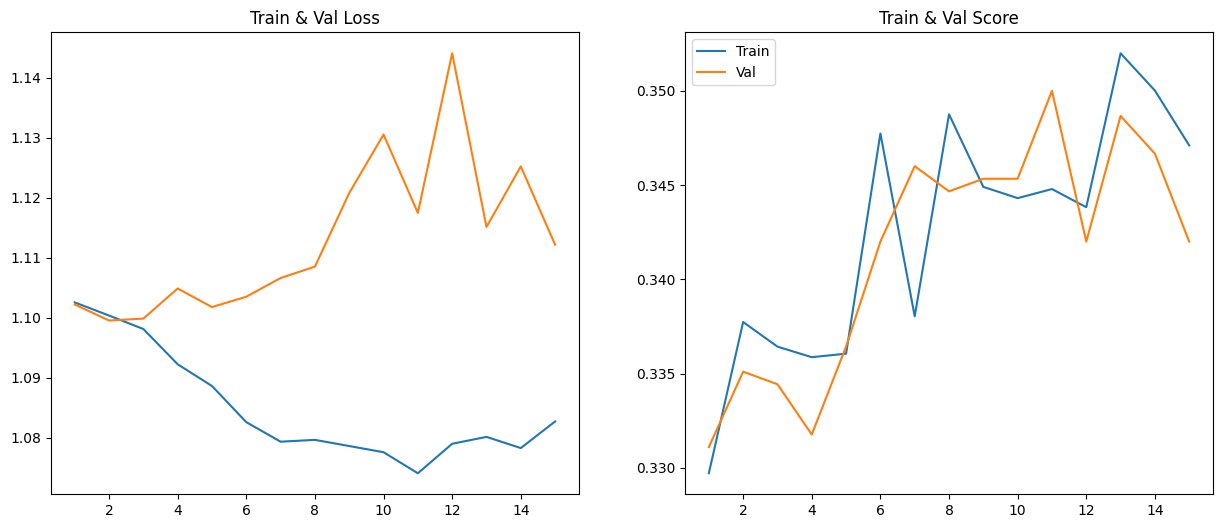

In [202]:
# 시각화
draw_result(EPOCH=ep, LOSS_HISTORY=LOSS_HISTORY, SCORE_HISTORY=SCORE_HISTORY)

In [203]:
def predict_mcf2(model, data, result):
    dataTS=data.reshape(1,-1) #torch.FloatTensor(data).reshape(1,-1)
    pre_val=model(dataTS)
    pre_val=F.softmax(pre_val, dim=1)
    print(f'{result[0]}: {max(pre_val[0].detach()):.4f}')
    return f'{result[0]}: {max(pre_val[0].detach()):.4f}'

In [204]:
# 검증
PATH='./model8newsclf_all.pth'
text='[제주=뉴시스] 양영전 기자 = 제주도교육청은 오는 12~13일 협재해수욕장과 표선해수욕장에서 2024년 제주바다쓰레기저감실천 캠페인 우리 처음 만난 바다처럼을 운영한다고 11일 밝혔다.'
test_model= torch.load(PATH)
from predict import *
# 한글만 남기고 모두 제거
a= re.sub('[^ㄱ-ㅎ가-힣]+',' ',text)
tokenizer=Okt()
# 토큰화
token_text=tokenizer.morphs(a)

#단어사전을 통한 벡터화
# 단어사전 불러오기
with open('vocab.pikle', 'rb') as f:
    test_vocab=pickle.load(f)
# 벡터화
vec_token= vectorize(vocab=test_vocab, DF=token_text, tokenizer=tokenizer)

# 패딩
vec_token= padding(length=50, text=vec_token)
vec_token=vec_token[0]
token_torch=torch.FloatTensor(vec_token).long()
print(token_torch)

test_model.eval()
with torch.no_grad():

    predict_mcf2(model=test_model, data=token_torch, result=['교육', '환경', '음식'])

FileNotFoundError: [Errno 2] No such file or directory: './model8newsclf_all.pth'

In [36]:
from sklearn.metrics import classification_report
# 시도 1 약 90점
model=torch.load('./model_final/try_1.pth',weights_only=False)
testDL=DataLoader(testDS,batch_size=len(testDS))
for feature, target in testDL:
    pre_y=model(feature)
    print(classification_report(target.detach().numpy(),torch.argmax(pre_y,dim=1).numpy()))

              precision    recall  f1-score   support

           0       0.90      0.93      0.92       507
           1       0.91      0.92      0.91       485
           2       0.89      0.86      0.88       495

    accuracy                           0.90      1487
   macro avg       0.90      0.90      0.90      1487
weighted avg       0.90      0.90      0.90      1487



In [37]:
# 시도 2 
# -> embedding 층 128-> 64
model=torch.load('./model_final/try_2.pth',weights_only=False)
testDL=DataLoader(testDS,batch_size=len(testDS))
for feature, target in testDL:
    pre_y=model(feature)
    print(classification_report(target.detach().numpy(),torch.argmax(pre_y,dim=1).numpy()))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       507
           1       0.90      0.92      0.91       485
           2       0.91      0.85      0.88       495

    accuracy                           0.90      1487
   macro avg       0.90      0.90      0.90      1487
weighted avg       0.90      0.90      0.90      1487



In [55]:
# 시도 3
# -> n_layers 2-> 4 
model=torch.load('./model_final/try_3.pth',weights_only=False)
testDL=DataLoader(testDS,batch_size=len(testDS))
for feature, target in testDL:
    pre_y=model(feature)
    print(classification_report(target.detach().numpy(),torch.argmax(pre_y,dim=1).numpy()))
# 성능 약간 다운

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       507
           1       0.86      0.92      0.89       485
           2       0.90      0.83      0.87       495

    accuracy                           0.89      1487
   macro avg       0.89      0.89      0.89      1487
weighted avg       0.89      0.89      0.89      1487



In [65]:
# 시도 4
# -> h_dim 64 -> 32
model=torch.load('./model_final/try_4.pth',weights_only=False)
testDL=DataLoader(testDS,batch_size=len(testDS))
for feature, target in testDL:
    pre_y=model(feature)
    print(classification_report(target.detach().numpy(),torch.argmax(pre_y,dim=1).numpy()))
# 처음이랑 거의 비슷

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       507
           1       0.90      0.93      0.91       485
           2       0.89      0.87      0.88       495

    accuracy                           0.91      1487
   macro avg       0.91      0.91      0.91      1487
weighted avg       0.91      0.91      0.91      1487



In [74]:
# 시도 5
# -> lstm -> rnn
model=torch.load('./model_final/try_5.pth',weights_only=False)
testDL=DataLoader(testDS,batch_size=len(testDS))
for feature, target in testDL:
    pre_y=model(feature)
    print(classification_report(target.detach().numpy(),torch.argmax(pre_y,dim=1).numpy()))
# 진짜 별로네..

              precision    recall  f1-score   support

           0       0.66      0.80      0.72       507
           1       0.45      0.21      0.29       485
           2       0.48      0.61      0.54       495

    accuracy                           0.55      1487
   macro avg       0.53      0.54      0.51      1487
weighted avg       0.53      0.55      0.52      1487



In [176]:
# 최적의 패딩값
# 85 -> 0.91
# 200 -> 0.921
# 367(평균) -> 0.93
# +++ 패딩값을 늘릴수록 학습이 길어짐..
model=torch.load('./model_final/try_6.pth',weights_only=False)
testDL=DataLoader(testDS,batch_size=len(testDS))
for feature, target in testDL:
    pre_y=model(feature)
    print(classification_report(target.detach().numpy(),torch.argmax(pre_y,dim=1).numpy()))


              precision    recall  f1-score   support

           0       0.95      0.92      0.93       507
           1       0.90      0.96      0.93       485
           2       0.91      0.89      0.90       495

    accuracy                           0.92      1487
   macro avg       0.92      0.92      0.92      1487
weighted avg       0.92      0.92      0.92      1487

